## Atividade Avaliativa 1.2 -- Classificando a Idade do Abalone

O Abalone é um gênero (_Haliotis_) de um moluscos gastrópodes marinhos da família _Haliotidae_. Foi identificado por Linnaeus em 1758 e suas diversas espécies podem ser encontradas em águas costeiras de quase todo o mundo. É usado na indústria alimentícia e em itens decorativos, tais como jóias ou instrumentos musicais [1](https://pt.wikipedia.org/wiki/Abalone). A idade do abalone pode ser obtida diretamente a partir de medidas físicas, porém é necessário cortar a concha, efetuar um processo de pigmentação, e então contar o número de anéis por meio de um microscópio -- tarefa considerada monótona e custosa [2](https://archive.ics.uci.edu/ml/datasets/Abalone).

Outras medidas do Abalone, entretanto, são mais fáceis de obter, não danificam a concha e podem ser utilizadas para estimar a idade com um modelo inteligente por meio de um processo de Aprendizado Supervisionado. Esse é o objetivo do presente projeto prático.

Base de dados original: https://archive.ics.uci.edu/ml/datasets/Abalone  
Base de dados preparada: abalone.csv (Disponível no Google Classroom)

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

## Parte 1 - Análise e Exploração de Dados

### Abertura do Dataset
Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos. Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [ ]:
data = pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para cada uma das respostas elencadas

In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


#### Quantos exemplos há no dataset?

In [ ]:
len(data)

4176

#### Quais os atributos existentes no dataset e seu tipo?

In [ ]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

#### Quantos a idade do abalone mais velho presente na base de dados? Quais seus atributos?

In [ ]:
data.loc[data["Age"].idxmax()]

Sex                    F
Length               0.7
Diameter           0.585
Height             0.185
Whole weight      1.8075
Shucked weight    0.7055
Viscera weight    0.3215
Shell weight       0.475
Age                   29
Name: 479, dtype: object

#### Histograma das idades

O histograma é um gráfico que mostra as frequências de uma determinada informação. No nosso caso, vamos construir um histograma que mostra as idades dos abalones. Vamos agrupar as idades em dez bins (caixas).

Ao ler o gráfico, veremos dez barras (bins). Elas sintetizam quantos abalones daquela faixa de idade existem no dataset. Os bins são partições do total de valores em 10 partes de mesmo tamanho.

Documentação completa disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


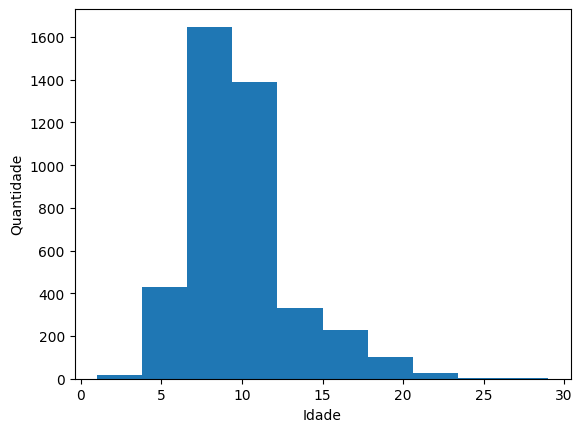

In [ ]:
plt.hist(data.Age, bins=10)
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.show()

#### Boxplot das idades

Como é a distribuição dos valores das idades dos abalones? O gráfico boxplot pode nos ajudar nesta questão.

O boxplot ilustra informações importantes:
- Mediana
- Limite inferior (menor valor)
- Limite superior (maior valor)
- Q1 (primeiro quartil, 25% dos dados)
- Q3 (terceiro quartil, 75% dos dados)
- Outliers (se houver)

A distribuição dos exemplos no dataset é simétrica no tocante à idade? Elabore um parágrafo que justifique as conclusões obtidas a partir da análise do boxplot.

Documentação completa disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

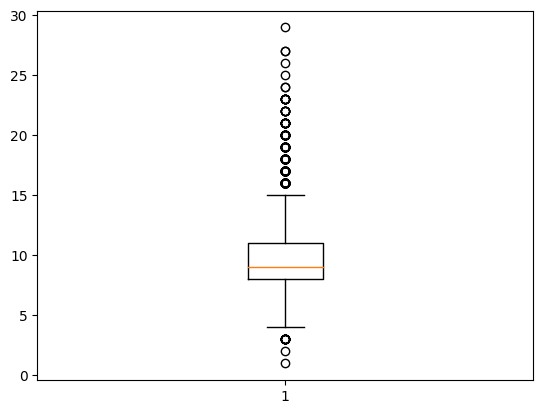

In [ ]:
plt.boxplot(data.Age)
plt.show()

O boxplot mostra que a mediana da idade das árvores é de aproximadamente 10 anos, isso é exibido a partir da linha laranja dentro da caixa principal. A caixa em sua totalidade exibe o intervalo onde se encontram os 50% centrais dos dados, no caso, entre 5 e 15 anos. Os limites inferiores e superiores são mostrados pelas linhas que se extendem da caixa até o limite onde se encontram os dados em quase toda sua totalidade, pelo gráfico, podemos perceber que o limite inferior é de aproximadamente 5 anos e o superior é de 15 anos. Por fim, as "bolinhas" que se extendem após as linhas exibem os valores incomuns que estão inseridos no dataset. Portanto, concluímos que o maior número de dados está entre plantas com idade acima de cinco anos até idades um pouco acima de 10 anos. Também notamos uma distribuição desbalanceada, que pode prejudicar nosso modelo de machine learning.

#### Há dados faltantes no dataset?

Dados faltantes (NaN) indicam que durante a coleta e elaboração da base de dados tais informações não estavam disponíveis. Trabalhar com dados faltantes acaba por limitar as nossas análises. Se há dados suficientes, podemos eliminar os dados faltantes. Se há poucos dados, pode-se buscar estratégias para substituir os dados faltantes.

Atividades:

A. Eliminar os dados faltantes.  
B. Quantos exemplos permaneceram no dataset?

In [ ]:
print(data.isna().any())
data = data.dropna()
len(data)

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool


4176

#### Sexo do Abalone

Conforme a documentação da base de dados, há três valores possíveis para o sexo do abalone, são elas:  
    - M: Masculino  
    - F: Feminino  
    - I: Infantil (ainda não definido)  
    
Tal como dispostas, segundo strings, essas informações não ajudam modelos que lidam apenas com dados numéricos. É necessário efetuar uma codificação para representar tais valores. Assim, codifique a coluna sexo conforme a abordagem One-Hot Encoding e elimine a coluna original do dataset.

Referências:
- https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
encoder = pd.get_dummies(data.Sex, dtype=int)
new_data = pd.concat([data, encoder], axis = 1)
new_data.drop(columns=["Sex"], inplace=True)
new_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0


## Parte 2 - Tarefa de Aprendizado de Máquina

Abordaremos o problema da previsão de idade como uma tarefa de classificação multiclasse. Embora uma tarefa de regressão pareça mais intuitiva nesse cenário, justificativas práticas motivam tal escolha, tal como a comparação com resultados já existentes na literatura.

#### Preparação dos dados para Validação Cruzada Holdout

- Vamos separar o atributo alvo (Age) dos atributores preditores.
  - Atributos preditores devem ser armazenados em uma variável denominada X  
  - Atributo alvo deve ser armazenado em uma variável denominada y
- Qual o tipo de entrada do modelo?
- Vamos efetuar uma partição do tipo holdout 70/30

Documentação completa disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X = new_data.drop(columns=["Age"]).values
y = new_data["Age"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Treinar um modelo de regressão logística para o problema

A Regressão Logística é uma técnica de Aprendizado de Máquina que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas.

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

Documentação completa disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Obtendo previsões do modelo

1. Selecione um exemplo arbitrário da partição de teste
2. Forneça os atributos preditores e obtenha a previsão da idade
3. O modelo previu a idade corretamente?

In [ ]:
x_sample = X_test[[0]]
y_sample = y_test[0]
pred = log_reg.predict(x_sample)
print(y_sample, pred)
if pred == y_sample:
  print("O modelo previu corretamente.")

else:
  print("O modelo não previu corretamente")

10 [9]
O modelo não previu corretamente


#### Avalie o modelo perante o conjunto de testes

1. Obtenha a acurácia, precisão, revocação e F_1 score
  * Efetue a importação de tais métricas a partir do pacote sklearn.metrics
  * Para fins de simplificação, considere os dados balanceados
2. Elabore uma visualização da matriz de confusão para as previsões do conjunto de testes
3. O modelo é bom para o problema? Justifique sua afirmação.

In [ ]:
def conf_matrix(y_true, y_pred, y_label=None):
  if y_label is None:
    labels = unique_labels(y_true)

  else:
    labels = unique_labels(y_label)

  columns = [f"Predicted {label}" for label in labels]
  indices = [f"Actual {label}" for label in labels]
  df = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=indices)
  return sns.heatmap(df, annot=True, cmap='viridis_r')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.17      0.05      0.08        39
           6       0.29      0.45      0.35        74
           7       0.39      0.30      0.34       121
           8       0.23      0.42      0.30       143
           9       0.23      0.42      0.30       203
          10       0.23      0.40      0.30       186
          11       0.35      0.19      0.25       170
          12       0.00      0.00      0.00        90
          13       0.00      0.00      0.00        61
          14       0.00      0.00      0.00        34
          15       0.00      0.00      0.00        33
          16       0.00      0.00      0.00        21
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00        18
          19       0.00    

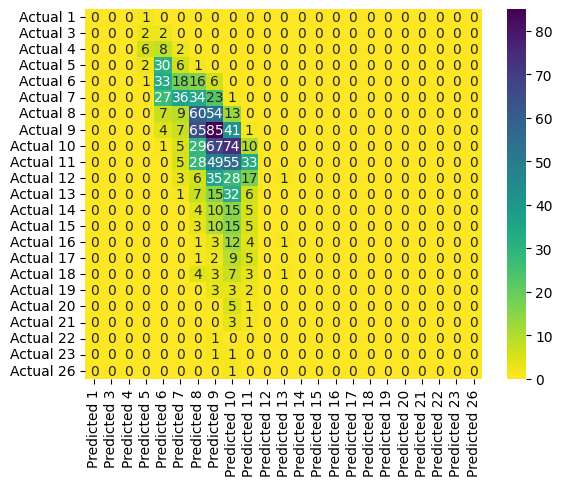

In [ ]:
lr_y_pred = log_reg.predict(X_test)
lr_metrics = classification_report(y_test, lr_y_pred)
print(lr_metrics)

matrix = conf_matrix(y_test, lr_y_pred)

Os resultados do treinamento do modelo mostraram baixa precisão do mesmo para acertar os valores de teste, com todas as métricas apresentando um valor muito baixo de acerto. A acurácia geral do modelo foi de apenas 26%, mostrando que o mesmo pode apresentar muitos erros. A precisão mais alta foi de 39% na classe 7, isso mostra que houve muitos erros na análise dos resultados positivos previstos pelo modelo. A revocação mais alta foi de 42%, indicando que menos da metade dos dados positivos do teste da classe 8 e 9 foram corretamente previstos. Já o F1 score das classes anteriormente citadas foi de 30%, indicando que a junção da precisão e da revocação ainda possui resultados abaixo do esperado. Portanto, o modelo é inadequado para o problema.

#### Treinar um modelo de K-Vizinhos Mais Próximos

É um algoritmo de Aprendizado de Máquina que baseia-se na média dos valores dos k vizinhos mais próximos a uma dada entrada para produzir uma estimativa para o atributo-alvo. É considerado "preguiçoso", mas muito mostra-se vantajoso por possuir um baixo custo computacional.

1. Efetue o treinamento do K-Vizinhos mais Próximos, considerando k = 5
2. Efetue o teste no modelo e obtenha as métricas de desempenho previamente indicadas.  
3. Comparando com o modelo anterior, qual deles teve melhor desempenho perante o problema? Justifique.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.25      0.38      0.30        16
           5       0.28      0.26      0.27        39
           6       0.23      0.31      0.26        74
           7       0.25      0.29      0.27       121
           8       0.20      0.28      0.23       143
           9       0.22      0.31      0.26       203
          10       0.24      0.30      0.26       186
          11       0.29      0.20      0.24       170
          12       0.11      0.06      0.07        90
          13       0.08      0.03      0.05        61
          14       0.09      0.03      0.04        34
          15       0.00      0.00      0.00        33
          16       0.17      0.05      0.07        21
          17       0.14      0.06      0.08        17
          18       0.00      0.00      0.00        18
          19       0.00    

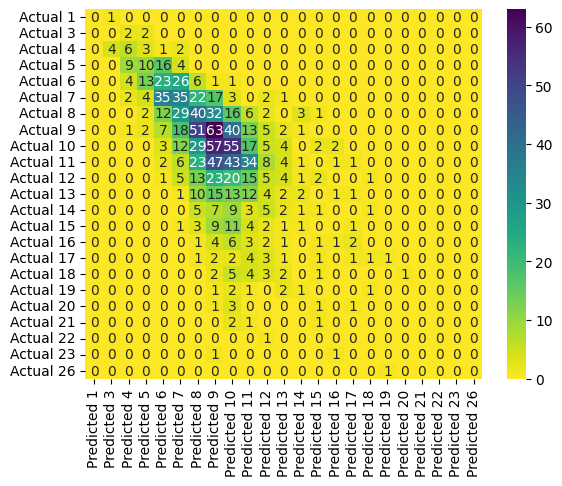

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

knn_metrics = classification_report(y_test, knn_y_pred)
print(knn_metrics)

matrix = conf_matrix(y_test, knn_y_pred)

O resultado de ambos os modelos mostra que, apesar das métricas do segundo modelo serem melhores que as métricas do primeiro quando ambos são expostos a poucos exemplos, o modelo de regressão logística supera o de k-vizinhos mais próximos de forma geral. Isso ocorre porque, ao obter mais dados de aprendizado, o primeiro modelo obtém melhor performance, podendo melhorar ainda mais seu desempenho a depender do tamanho de dados disponíveis no dataset.

#### Argumente

Qual o grau de dificuldade da tarefa de aprendizado em questão? Justifique a partir dos elementos e resultados obtidos nas células anteriores.

Ambos os modelos apresentam baixa precisão no momento de previsão e por tal motivo tem certo grau de dificuldade na tarefa de aprendizado, uma vez que os modelos não foram capazes de identificar padrões nos dados

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         4
           4       0.26      0.38      0.31        16
           5       0.39      0.31      0.34        39
           6       0.24      0.24      0.24        74
           7       0.34      0.33      0.34       121
           8       0.25      0.34      0.29       143
           9       0.25      0.31      0.28       203
          10       0.23      0.29      0.26       186
          11       0.26      0.22      0.24       170
          12       0.23      0.11      0.15        90
          13       0.12      0.10      0.11        61
          14       0.00      0.00      0.00        34
          15       0.07      0.03      0.04        33
          16       0.12      0.10      0.11        21
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00        18
          19       0.25    

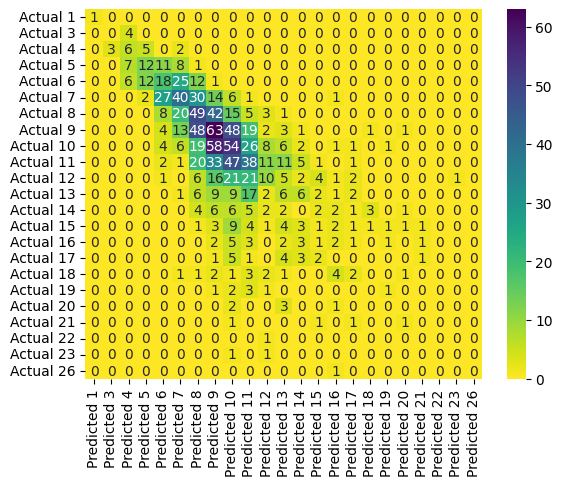

In [ ]:
xgb = XGBClassifier(objective='multi:softmax')

xgb.fit(X_train, y_train_encoded)
xgb_y_pred = xgb.predict(X_test)

targets = unique_labels(y_test)
targets = [str(target) for target in targets]
xgb_metrics = classification_report(y_test_encoded, xgb_y_pred, target_names=targets)
print(xgb_metrics)

matrix = conf_matrix(y_test_encoded, xgb_y_pred, y_test)